- BMI 예제

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

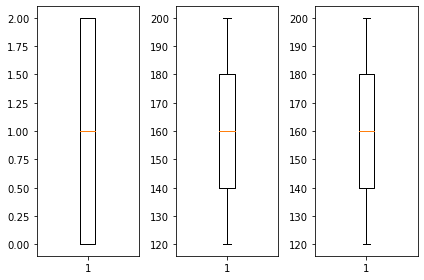

In [2]:
df = pd.read_csv('../data/bmi/bmi.csv', skiprows=3)

# 결측치 확인
df.isnull().sum()

# 이상치 확인fat
fig = plt.figure()

fig_1 = fig.add_subplot(1,3,1)
fig_2 = fig.add_subplot(1,3,2)
fig_3 = fig.add_subplot(1,3,3)

fig_1.boxplot(df['label'])
fig_2.boxplot(df['height'])
fig_3.boxplot(df['height'])

fig.tight_layout()
plt.show() # 이상치 없음

In [3]:
# training data set
x_data = df[['height', 'height']].values.reshape(-1,2)
t_data = df['label'].values.reshape(-1,1) # One-Hot Encoding 추가 적용해야함

# 정규화
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
norm_x_data = scaler_x.transform(x_data)

# One-Hot Encoding with tensorflow
sess = tf.Session()

# one_hot(data, depth(label의 종류))
norm_t_data = sess.run(tf.one_hot(t_data, depth=3)).reshape(-1,3)

In [18]:
# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,3], dtype=tf.float32)

# W & b
W = tf.Variable(tf.random.normal([2,3]))
b = tf.Variable(tf.random.normal([3]))

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.nn.softmax(logit)

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 초기화
sess.run(tf.global_variables_initializer())

In [12]:
# k-fold cross validation 구현

x_data_1,x_data_2,x_data_3,x_data_4,x_data_5  = np.array_split(norm_x_data, 5)
t_data_1,t_data_2,t_data_3,t_data_4,t_data_5  = np.array_split(norm_t_data, 5)

In [27]:
# trianing과 test 분리해서 학습진행
acc_list = []
for i in range(5):
    x_ary_list = [x_data_1,x_data_2,x_data_3,x_data_4,x_data_5]
    t_ary_list = [t_data_1,t_data_2,t_data_3,t_data_4,t_data_5]
    
    test_x_data = x_ary_list[i]
    test_t_data = t_ary_list[i]
    del x_ary_list[i]
    del t_ary_list[i]
    train_x_data = np.concatenate(x_ary_list)
    train_t_data = np.concatenate(t_ary_list)
    
    # learning
    for step in range(300000):
        _,W_val,b_val,loss_val = sess.run([train,W,b,loss], 
                                          feed_dict={X : train_x_data, T : train_t_data })

        if step % 150000 == 0:
            print('W:{},b:{},loss:{}'.format(W_val,b_val,loss_val))
    
    # prediction
    result = sess.run(H, feed_dict={X: test_x_data})
    accuracy_list = np.equal(result.argmax(axis=1), test_t_data.argmax(axis=1))
    acc_list.append(accuracy_list.sum()/len(accuracy_list))
    
    print('{}번째 학습 결과 : {}'.format(i+1, accuracy_list.sum()/len(accuracy_list)))

W:[[ 1.7655548   1.7402388  -2.345028  ]
 [ 0.39586538 -1.5706491  -1.3522702 ]],b:[-2.517683   -1.4347116   0.43405953],loss:0.7925459146499634
W:[[ 1.9366671  1.7581202 -2.5352478]
 [ 0.5661939 -1.5527678 -1.5409033]],b:[-2.7160273 -1.4142797  0.6110362],loss:0.7789632081985474
0번째 학습 결과 : 0.62525
W:[[ 2.0734859  1.7702047 -2.6811874]
 [ 0.7043349 -1.5406833 -1.6880385]],b:[-2.8749914  -1.3939303   0.74934757],loss:0.7730915546417236
W:[[ 2.1807742  1.7846316 -2.8007917]
 [ 0.8146547 -1.5262563 -1.8096148]],b:[-2.9945023 -1.3709974  0.8488314],loss:0.7677604556083679
1번째 학습 결과 : 0.6455
W:[[ 2.2606523  1.7866327 -2.9042428]
 [ 0.9045416 -1.5242553 -1.9029946]],b:[-3.1018481  -1.353116    0.93981916],loss:0.7642175555229187
W:[[ 2.339875   1.783884  -2.9757683]
 [ 0.9898959 -1.5270039 -1.9834491]],b:[-3.1872954 -1.3401169  1.0170336],loss:0.7615259885787964
2번째 학습 결과 : 0.626
W:[[ 2.4114006  1.783884  -3.047294 ]
 [ 1.0535121 -1.5270039 -2.0549748]],b:[-3.2623863 -1.3221105  1.0849469],

In [28]:
acc_list = np.array(acc_list)
print('최종 Accuracy : {}'.format(acc_list .mean()))

최종 Accuracy : 0.6295499999999999


- [argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy.argmax): 최대값의 index 반환
- [equal()](https://numpy.org/doc/stable/reference/generated/numpy.equal.html?highlight=equal) : ndarray 비교
- [array_split()](https://numpy.org/doc/stable/reference/generated/numpy.array_split.html#numpy.array_split) : ndarray 분할